In [17]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

READ DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

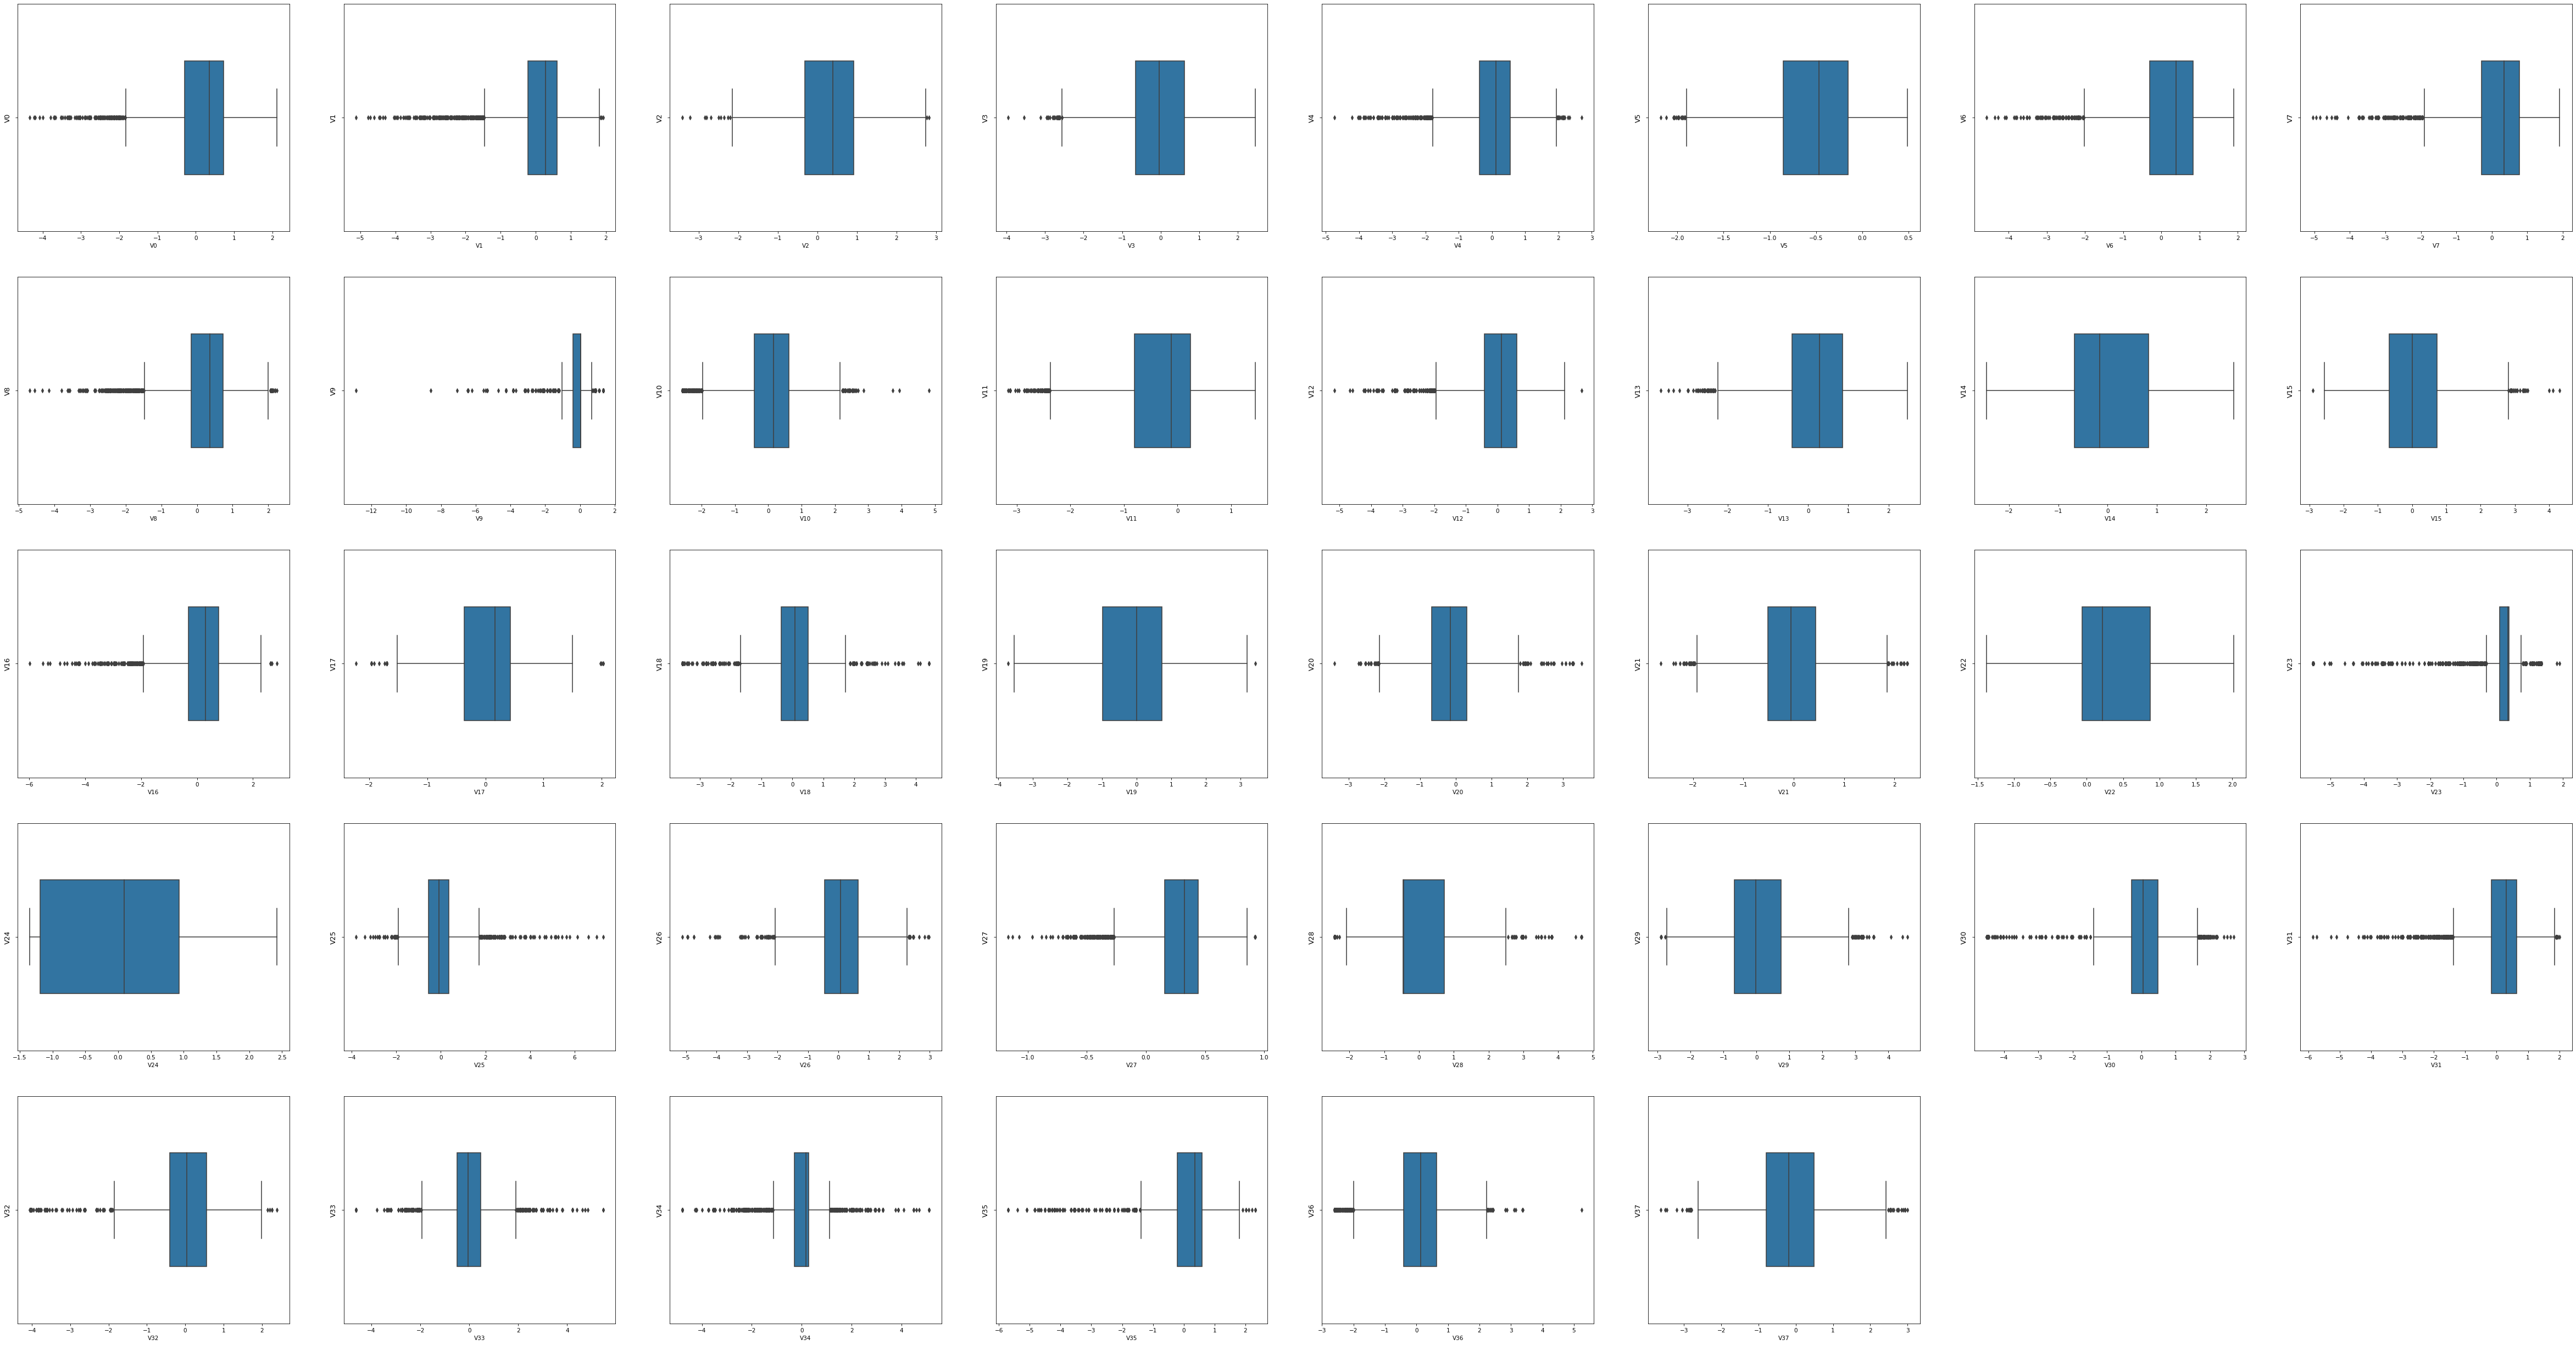

In [18]:
train_data_file = 'data/zhengqi_train.txt'
test_data_file = 'data/zhengqi_test.txt'

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

train_data.info()  # data信息，非具体数据
test_data.info()

print(train_data.describe())  # data count, mean, std, min, 25%, 50%, 75%, max
print(test_data.describe())

print(train_data.head())  # 默认五条
print(test_data.head())

column = train_data.columns.tolist()[:39]  # 列表头
fig = plt.figure(figsize=(80, 60), dpi=75)
for i in range(38):
    plt.subplot(7, 8, i+1)
    sns.boxplot(train_data[column[i]], orient='v', width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=12)
plt.show()

ABNORMAL DETECT

R2= 0.8890858938210386
mse= 0.10734857773123632
-------------------------------------------
mean of residuals: -1.737606672889788e-17
std of residuals: 0.3276976673193499
-------------------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


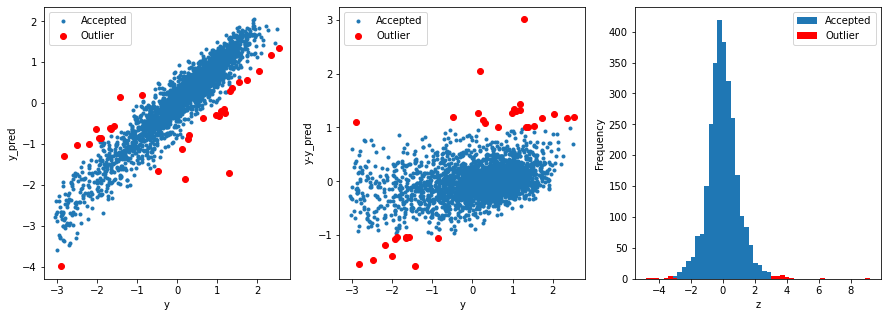

In [19]:
# 3 sigma rule
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def find_outliers(model, X, y, sigma=3):
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)

    except:
        model.fit(X, y)
        y_pred = pd.Series(model.predict(X), index=y.index)

    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index

    # print and plot results
    print("R2=", model.score(X, y))
    print("mse=", mean_squared_error(y, y_pred))
    print("-------------------------------------------")
    print("mean of residuals:", mean_resid)
    print("std of residuals:", std_resid)
    print("-------------------------------------------")

    print(len(outliers), "outliers:")
    print(outliers.tolist())

    plt.figure(figsize=(15, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y, y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')

    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y-y_pred, '.')
    plt.plot(y.loc[outliers], y.loc[outliers]-y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y-y_pred')

    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins=50, ax=ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend('')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('z')

    plt.savefig('outliers.png')
    return outliers

X_train = train_data.iloc[:, 0:-1]
y_train = train_data.iloc[:, -1]
outliers = find_outliers(Ridge(), X_train, y_train)

Histogram and Q-Q Diagram

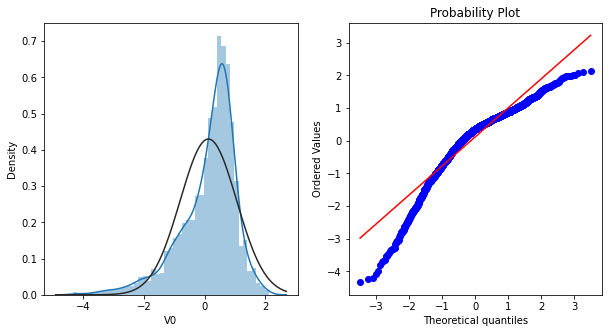

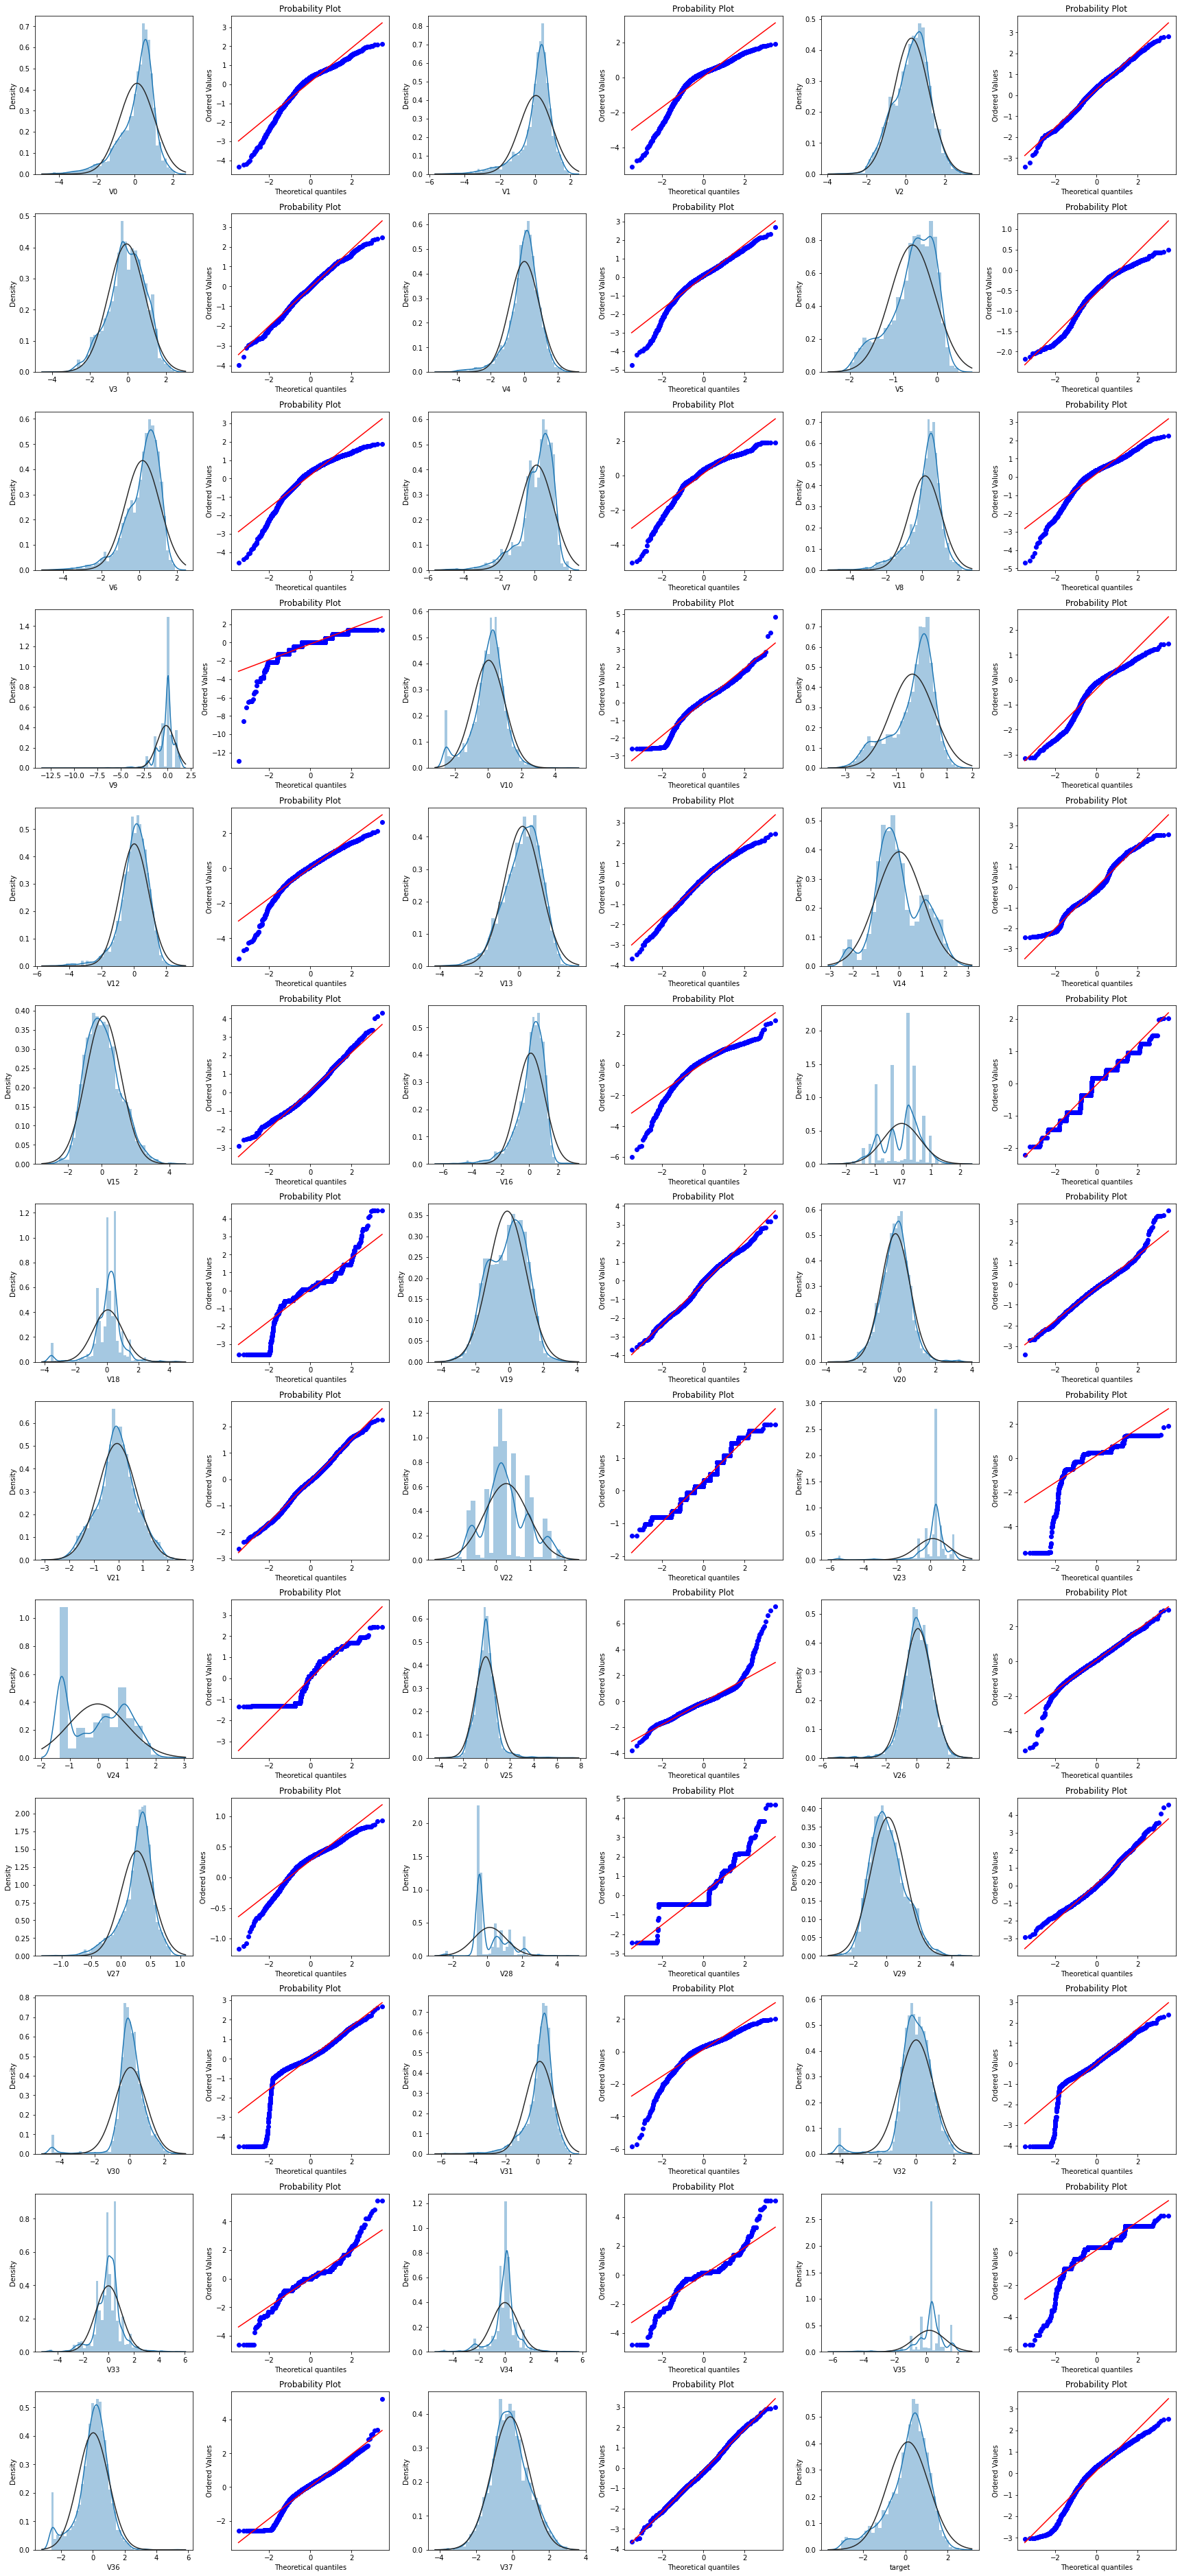

In [20]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)
sns.distplot(train_data['V0'], fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(train_data['V0'], plot=plt)

train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols, 4*train_rows))

i = 0
for col in train_data.columns:
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_data[col], fit=stats.norm)

    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(train_data[col], plot=plt)
plt.tight_layout()
plt.show()

KDE Distribution Diagram

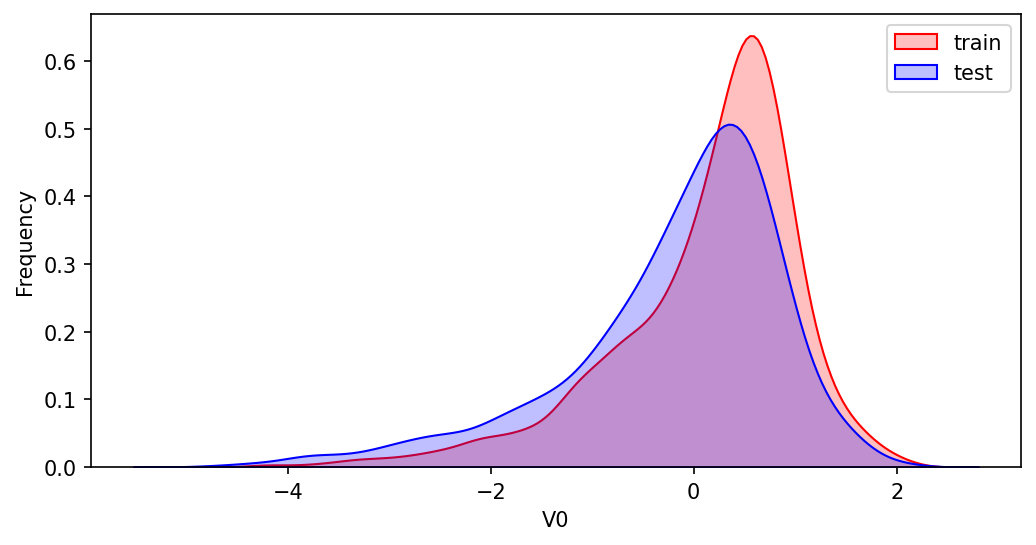

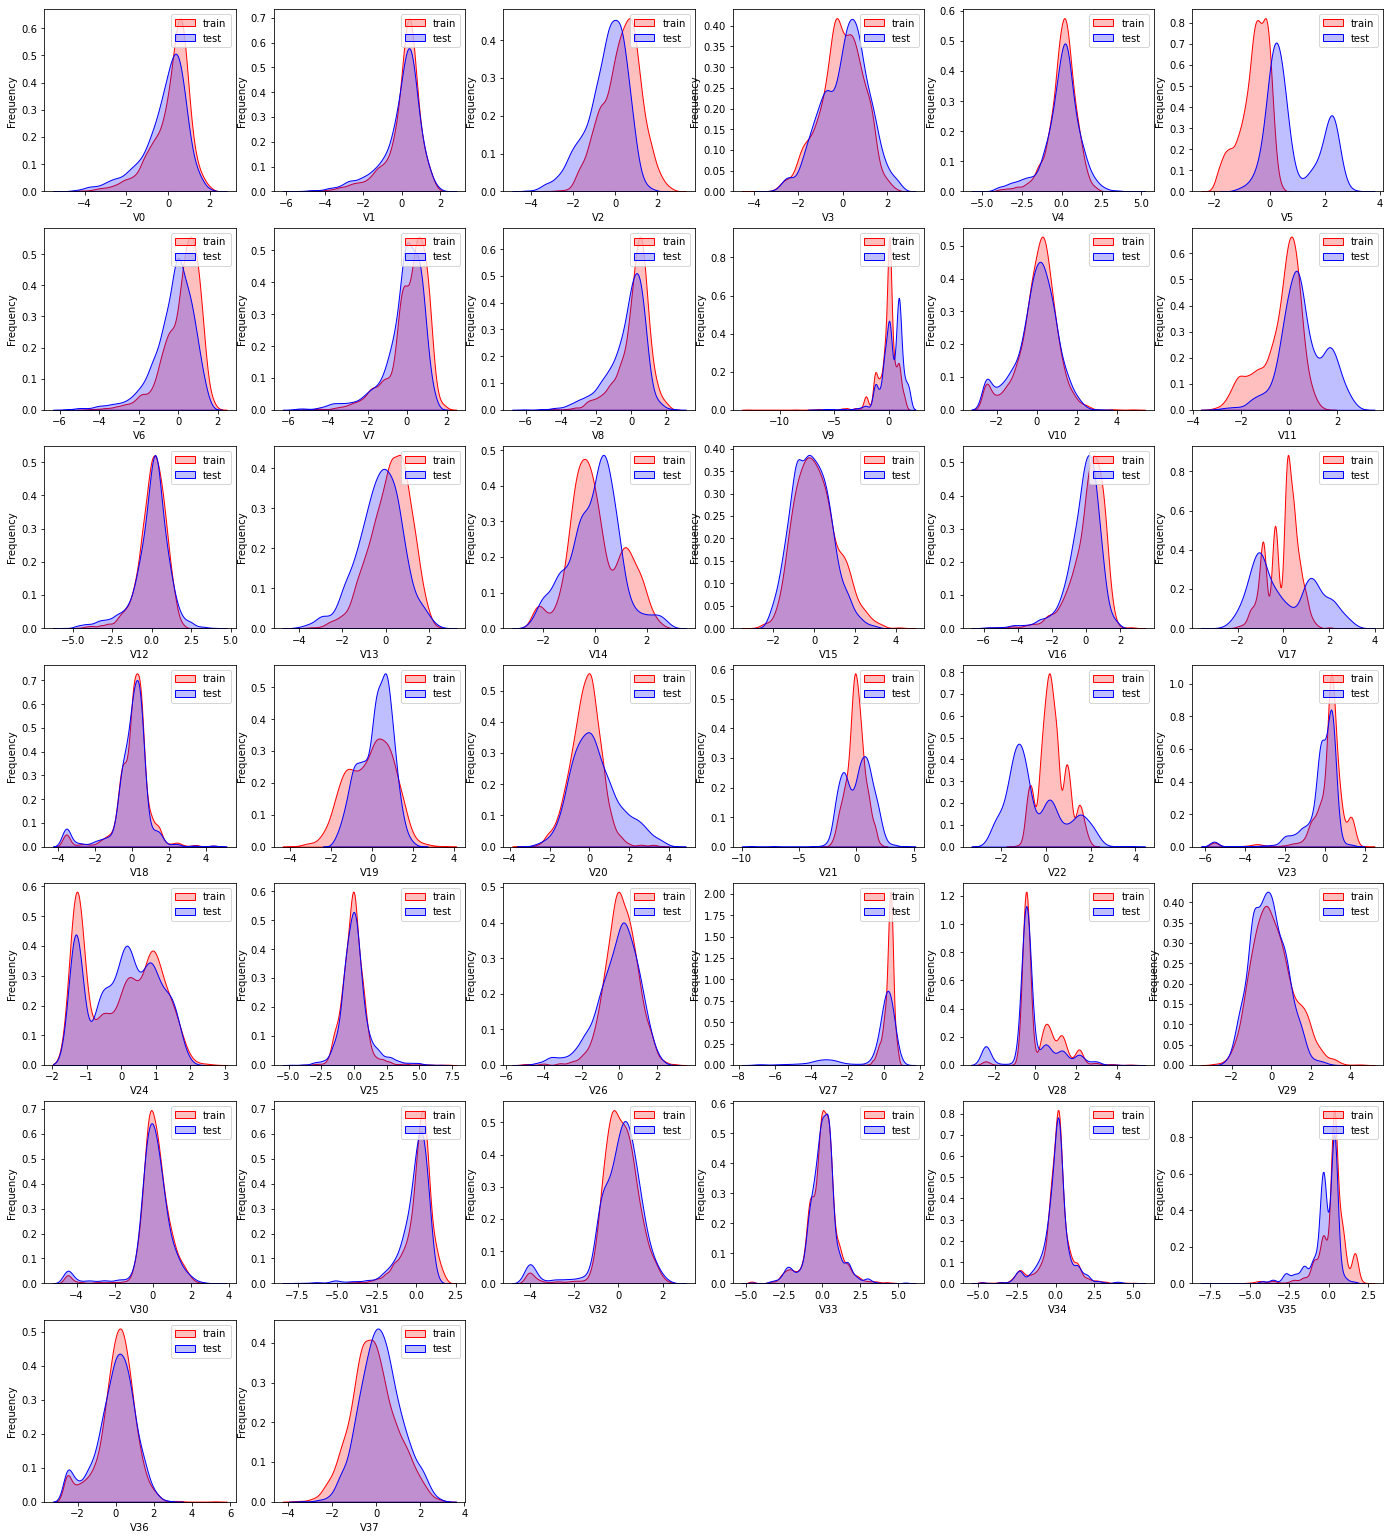

In [21]:
plt.figure(figsize=(8, 4), dpi=150)
ax = sns.kdeplot(train_data['V0'], color='Red', shade=True)
ax = sns.kdeplot(test_data['V0'], color='Blue', shade=True)
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(['train', 'test'])

dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color='Red', shade=True)
    ax = sns.kdeplot(test_data[col], color='Blue', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(['train', 'test'])
    i += 1
plt.show()

Linear Regression Diagram

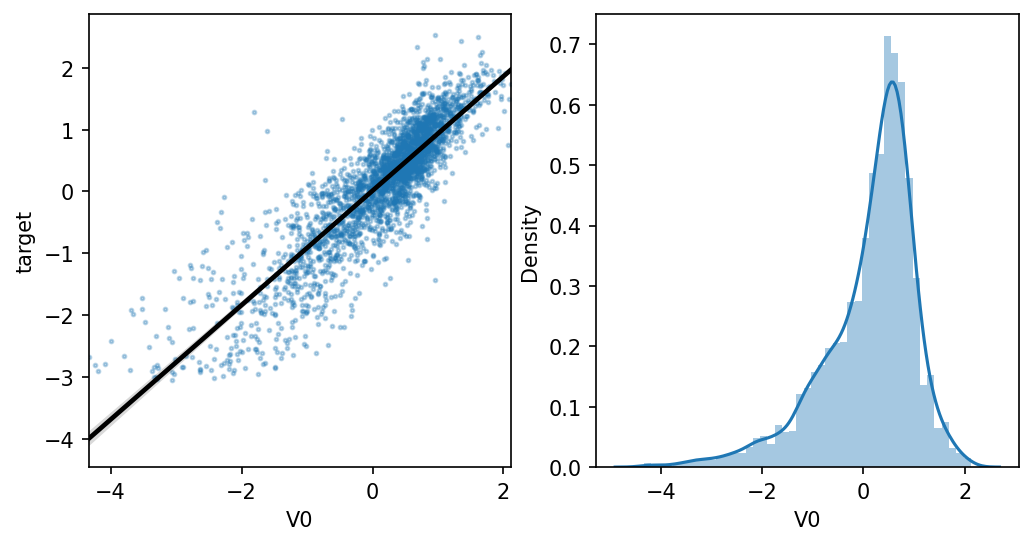

In [ ]:
fcols = 2
frows = 1
plt.figure(figsize=(8, 4), dpi=150)

ax = plt.subplot(1, 2, 1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax,
            scatter_kws={'marker':'.', 's':3, 'alpha':0.3},
            line_kws={'color':'k'})
plt.subplot(1, 2, 2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5 * fcols, 4 * frows))

i = 0
for col in test_data.columns:
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x='V0', y='target', data=train_data, ax=ax,
                scatter_kws={'marker': '.', 's': 3, 'alpha': 0.3},
                line_kws={'color': 'k'})
    plt.xlabel(col)
    plt.ylabel('target')

    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

Relativity

In [ ]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
data_train1 = train_data.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], axis=1)
train_corr = data_train1.corr()
print(train_corr)

ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)
annot = True

k = 10
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()

threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[top_corr_features].corr(),
                annot=True, cmap='RdYlGn')

corr_matrix = data_train1.corr().abs()
drop_col = corr_matrix[corr_matrix["target"]<threshold].index

Box-Cox Convert


In [ ]:
drop_columns = ['V5', 'V8', 'V11', 'V17', 'V22', 'V28']
# merge the train and test data
train_x = train_data.drop(['target'], axis=1)

data_all = pd.concat([train_x, test_data])

data_all.drop(drop_columns, axis=1, inplace=True)
data_all.head()

cols_numeric = list(data_all.columns)

def scale_minmax(col):
    return (col-col.min()) / (col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax, axis=0)
data_all[cols_numeric].describe

train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax, axis=0)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax, axis=0)

cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols, 4*frows))
i = 0

for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
    i += 1
    plt.subplot(frows, fcols, i)
    sns.distplot(dat[var], fit=stats.norm)
    plt.title(var+'Original')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)
    plt.title('skew' + '{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)
    plt.title('corr' + '{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))

    i += 1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var, fit=stats.norm)
    plt.title(var+'Transformed')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew' + '{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)
    plt.title('corr' + '{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))